In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull()

#True given if null value, False if there is a value

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
train[train['Cabin'].isnull()==False] 

#method to pull indeces where cabins have data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


<AxesSubplot:>

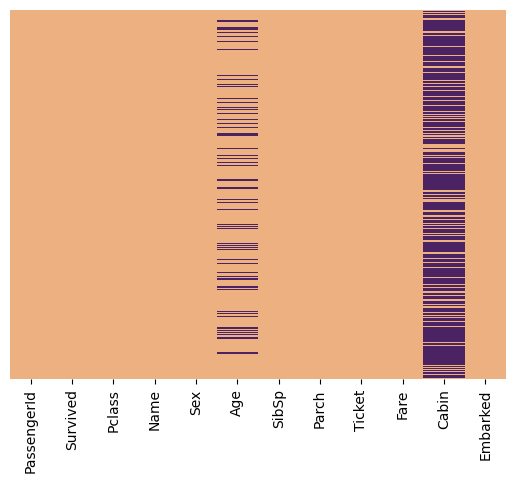

In [17]:
sns.heatmap(train.isnull(),yticklabels = False,cbar = False,cmap = 'flare')

In [14]:
#shows we are missing substantial amounts of age and cabin info.
#lecture says we are missing one embarked

In [15]:
train[train['Embarked'].isnull()] #missing two in reality

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [22]:
#approx 20% of age info is missing and the proportion of age missing
#is likely small enough that the info from the other columns can be
#used to reasonably estimate it
#cabin info is too incomplete to be useful in current state

In [23]:
len(train[train['Cabin'].isnull()])/len(train['Cabin'])

0.7710437710437711

In [24]:
#approximately 77% of the Cabin info is missing

In [25]:
len(train[train['Age'].isnull()])/len(train['Age'])

0.19865319865319866

In [ ]:
#approximately 20% (as mentioned in lecture) is missing from Age.

In [20]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

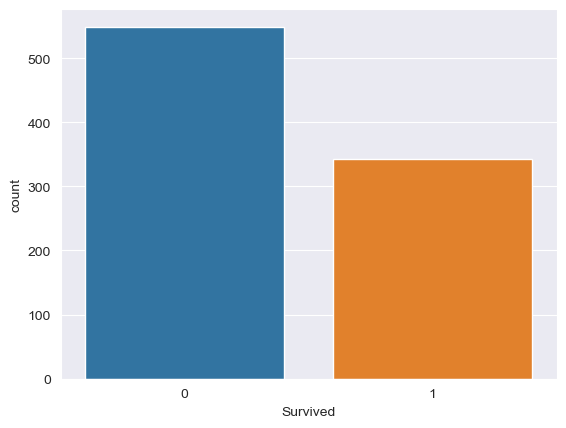

In [21]:
sns.countplot(x='Survived',data=train)

In [26]:
#approx 550 did not survive, and approx 350 survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

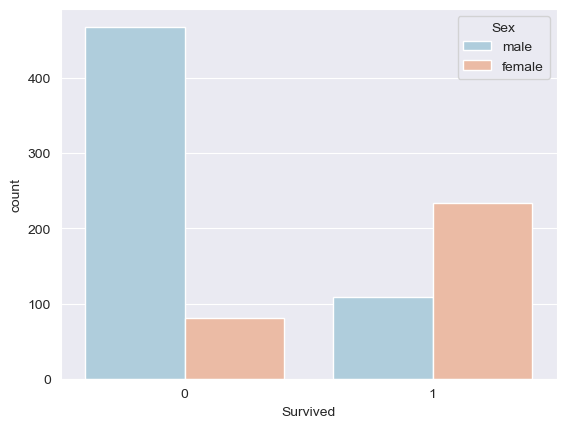

In [28]:
sns.countplot(x='Survived',data=train,hue = 'Sex',palette='RdBu_r')

In [29]:
#people who did not survive were much more likely to be male, and the 
#survivors were almost twice as likely to be female

<AxesSubplot:xlabel='Survived', ylabel='count'>

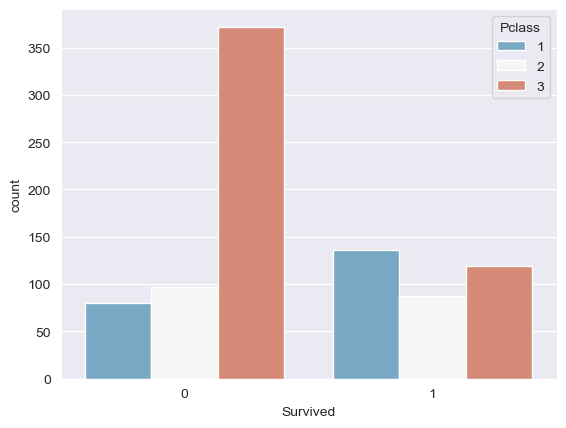

In [30]:
sns.countplot(x='Survived',data=train,hue = 'Pclass',palette='RdBu_r')

In [31]:
#third class was much more likely not to survive

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

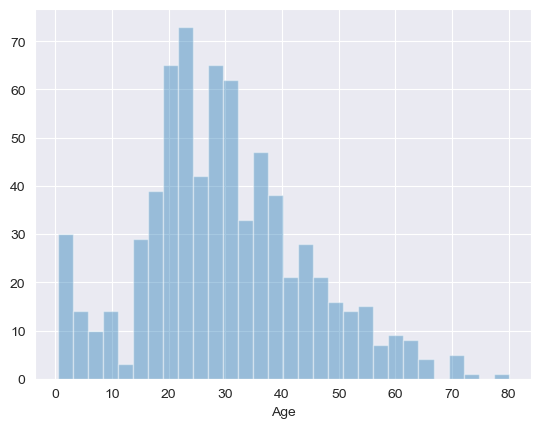

In [34]:
sns.distplot(train['Age'].dropna(),kde=False,bins = 30)

<AxesSubplot:xlabel='Age'>

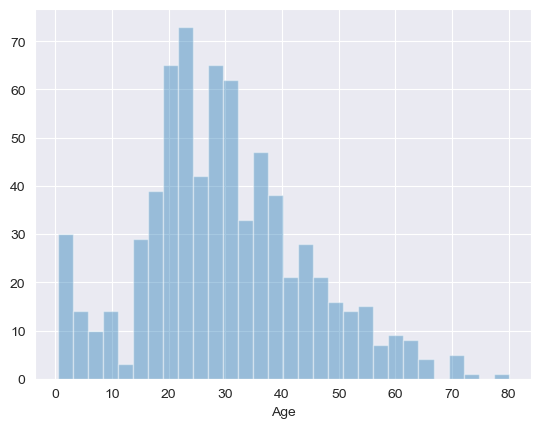

In [35]:
sns.distplot(train['Age'],kde=False,bins = 30)

#bimodal distribution, there is a spike between ages 0-10, which then
#drops off and raises again between 20-40, and there is then a continual
#decline as age progresses

In [36]:
#dropped null values don't seem to have substantial impact?

<AxesSubplot:ylabel='Frequency'>

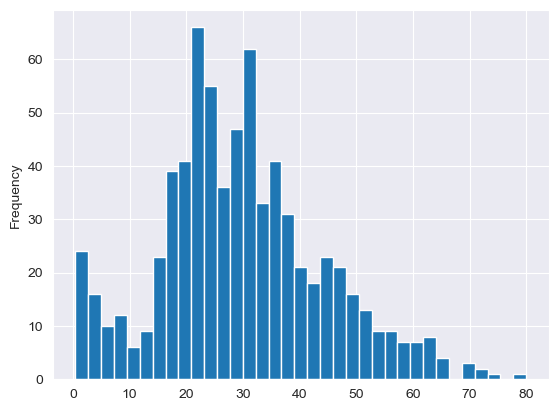

In [56]:
train['Age'].dropna().plot.hist(bins=35)

#alternate way

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

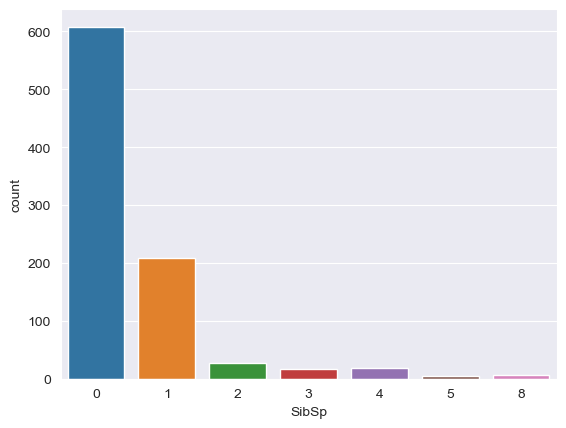

In [39]:
sns.countplot(x='SibSp',data=train)

In [40]:
#most people on board did not have children or a spouse on board, second
#common is 1, which is probably a spouse

<AxesSubplot:xlabel='Parch', ylabel='count'>

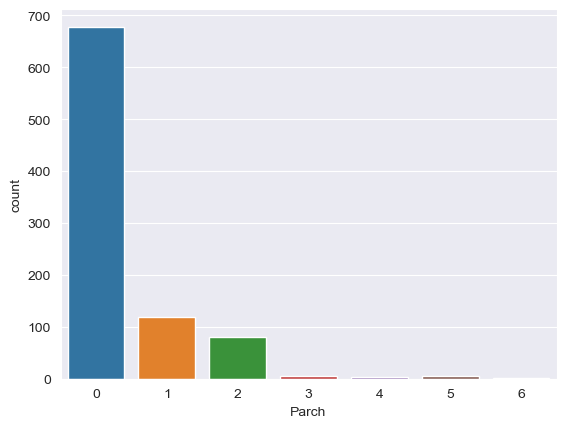

In [41]:
sns.countplot(x='Parch',data=train)

In [42]:
#same as above, most people did not have a parent or child on board
#worth considering that parent/child pairs as well as sibling/spouse
#pairs will be counted at least twice, so for the slightly over 100
#number represented, that means there were actually approx 50 parent
#child pairs.

<AxesSubplot:>

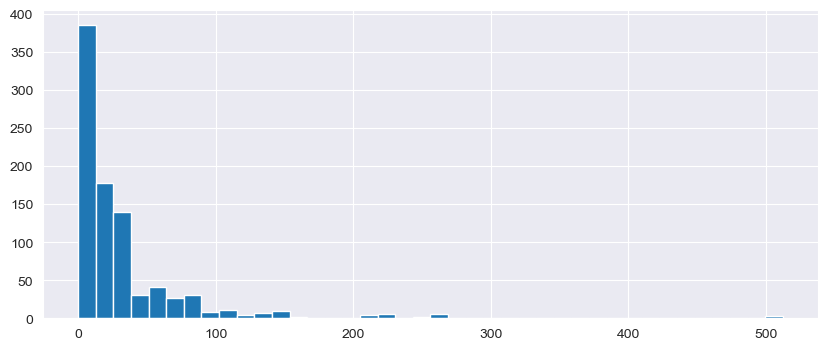

In [45]:
train['Fare'].hist(bins = 40, figsize = (10,4))

In [46]:
#most purchase prices were between 0 and 50

In [47]:
import cufflinks as cf

In [49]:
cf.go_offline()

In [53]:
train['Fare'].iplot(kind='hist',bins=40)

<AxesSubplot:>

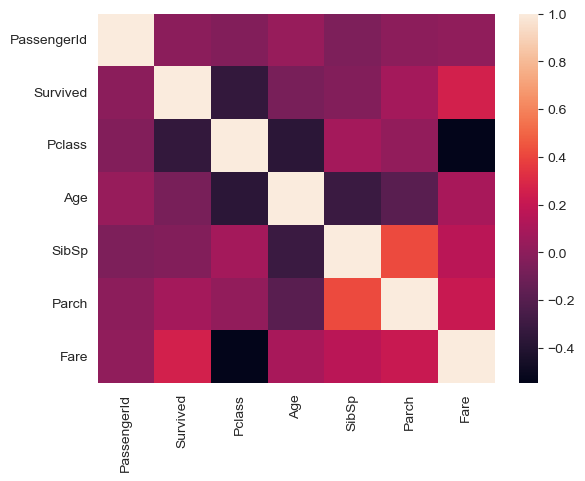

In [54]:
sns.heatmap(train.corr())

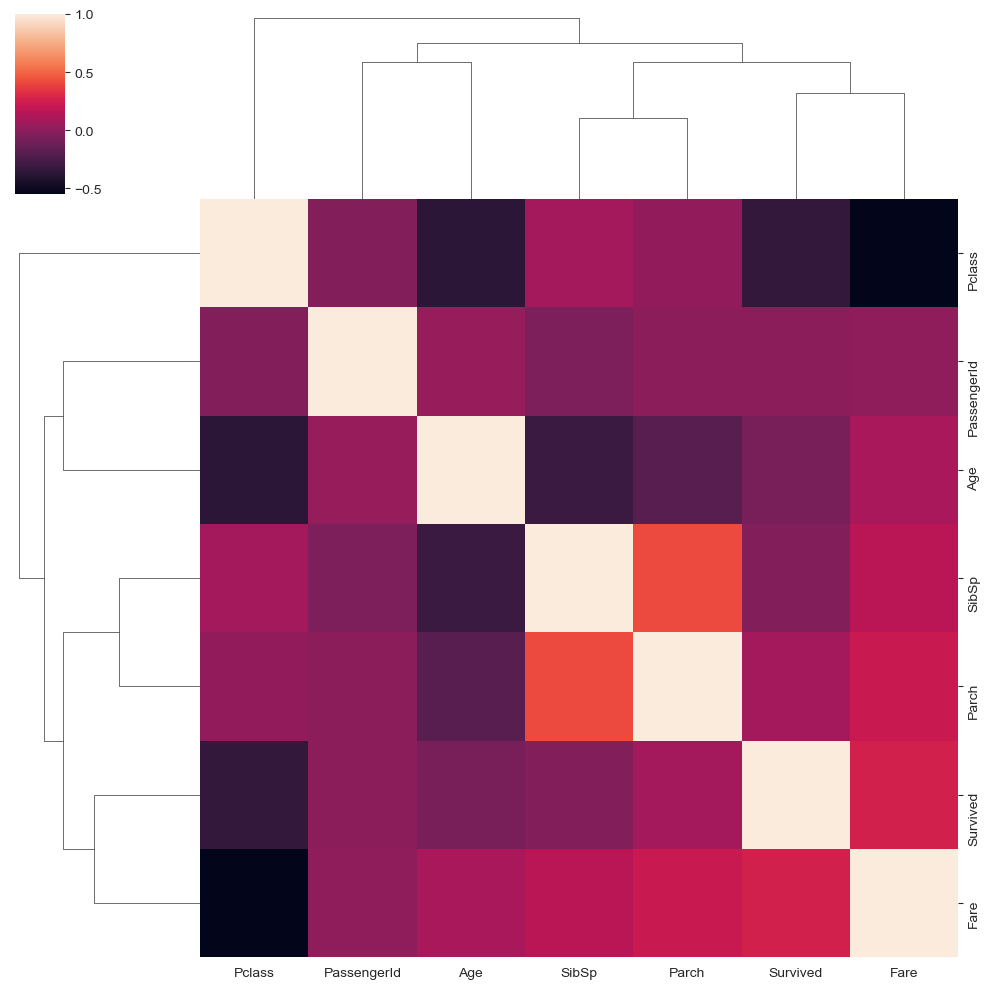

In [55]:
sns.clustermap(train.corr())

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

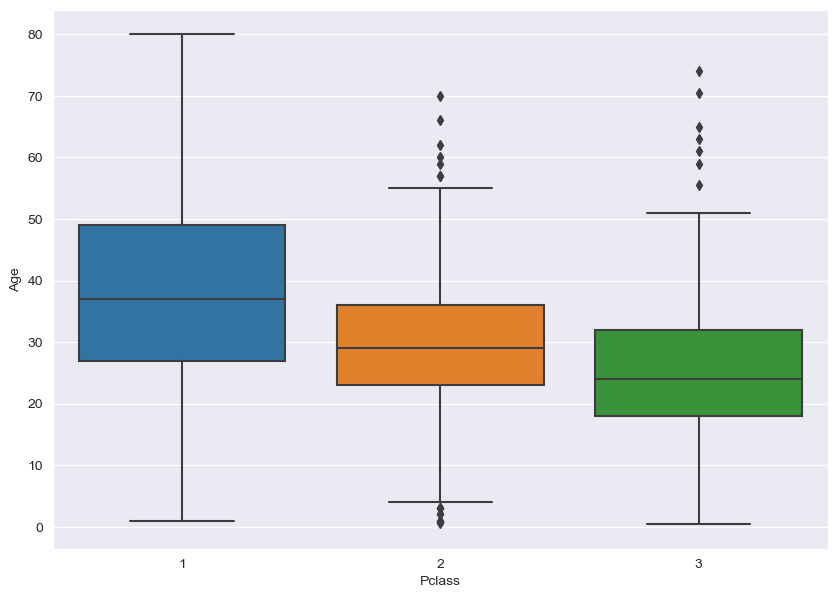

In [59]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [60]:
#wealthier passengers tend to be older in 1st class than the other 2.
#this can be used to predict the values of the missing age data.
#a regression model could also be developed to predict the missing age
#values based on all the factors

In [94]:
def impute_age (cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37 #from visually inspecting the box plot
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [65]:
train['Age']= train[['Age','Pclass']].apply(impute_age,axis=1)

#if axis = 0, it only returns one value

In [66]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [68]:

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
print(train[['Age','Pclass']].apply(impute_age,axis=1))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Length: 891, dtype: float64


In [81]:
train[['Age','Pclass']].iloc[0]

Age       22.0
Pclass     3.0
Name: 0, dtype: float64

In [214]:
def impute_ageTest (cols):
    Age = cols[0] 
    Pclass = cols[1] 
    #cols.info()
    #print(type(cols))
    print(cols)
    print(Age)
    #print(Pclass)
    if Age ==22:
        if Pclass==1:
            return 37 #from visually inspecting the box plot
        elif Pclass ==38:
            return 29
        else:
            return 24
    else:
        return 'Test'

print(train[['Age','Pclass']].apply(impute_ageTest,axis=0))

#once the function applies the dataframe is read as a series

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64
22.0
0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 889, dtype: int64
3
Age         29
Pclass    Test
dtype: object


In [ ]:
#running the function along axis=0 causes the function just to be run
#along the indeces and for cols[0] to be read as [22,3].
#The second index [38,1] is then read as cols[1]. 
#when axis = 0, cols is 2 sets of series that are each 889 in length.
#cols[0] therefore grabs 22 from the first set and 3 from the second.
#when axis = 1, cols is 889 sets of series that are each 2 entries
#long, one of age and one of pclass. cols[0] is therefore every age 
#entry and cols[1] is every pclass entry. The series are pulled this 
#way because axis = 0 generates cols along the rows and reads each column
#as one set of the series. When axis = 1, cols generates along the 
#columns and reads each row as one set of the series each.

In [89]:
#same result as calling index 0 of the inputted df, is the function
#applied across the rows and if 22 were NaN would it be looking to
#see if 38 was 1,2, or 3?

In [165]:
ageClass = train[['Age','Pclass']]['Age']
#type(ageClass)
ageClass[0]

22.0

In [96]:
#creating a list with train and then calling the coordinates

In [100]:
for x in train: #for loop test of pulling column names
    print(x)
    
#can also be done using train.columns

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [143]:
train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

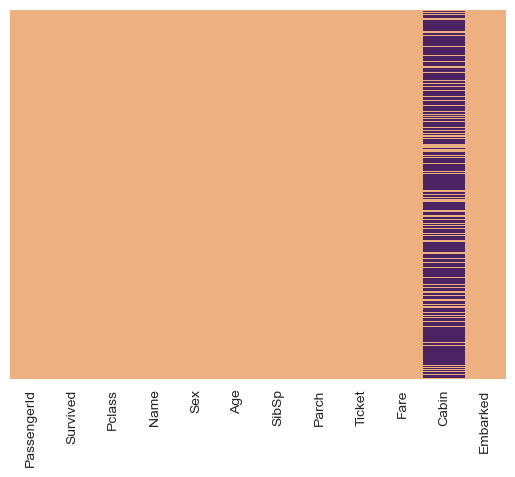

In [145]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='flare')

In [147]:
train.drop('Cabin',axis=1,inplace=True)

In [149]:
train.head() #cabin column gone

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

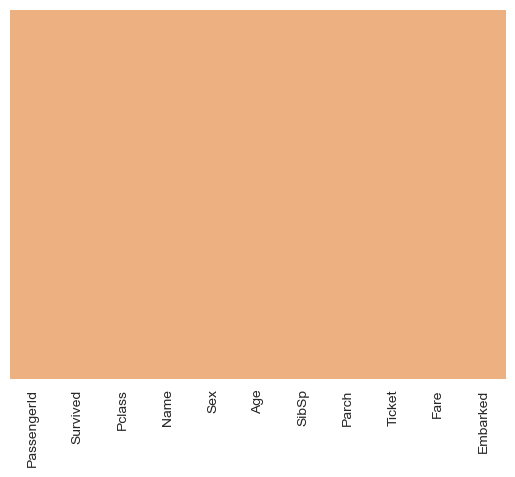

In [151]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='flare')

In [150]:
train.dropna(inplace=True)

In [152]:
#dummy variable - need to translate columns into something the machine
#learning algorithm can understand (sex and embarked)

In [178]:
pd.get_dummies(train['Sex'])#.sum(axis=1)

#multicolinearity - female column is perfect predictor of male column,
#which should be avoided

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [166]:
train.head()['Sex'][0]

'male'

In [180]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

#drop_first eliminates multicolinearity

In [181]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [189]:
pd.get_dummies(train['Embarked']).head()#,drop_first=True)
#dropping the first column stops the it from being a perfect predictor;
#if q or s are both 0, c will be 1

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [187]:
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [191]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [192]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [193]:
train = pd.concat([train,sex,embark],axis=1)

In [194]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [195]:
#male, q, and s are indicator/dummy variables. embark and sex columns
#are not needed, nor are name or ticket

In [215]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace = True)

In [216]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [217]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [220]:
train.drop('PassengerId',axis=1,inplace=True)

In [221]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [222]:
#Pclass is also categorical so pd.get_dummies could also be run on this.
#explore the differences later after completing the model with it 
#remaining as a normal column. What are the differences that arise when
#you leave it alone vs when you use pd.get_dummies. This should reveal
#how the machine learning algorithm reacts when it is treated as a
#category vs when it is treated as a continuous variable.

In [229]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [225]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [226]:
from sklearn.model_selection import train_test_split

In [227]:
# type train_test_split then shift+tab, scroll down and copy X_train, X_test, y_train, y_test = train_test_split(
#...     X, y, test_size=0.33, random_state=42)

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X,
    y, test_size=0.3, random_state=101)

In [231]:
from sklearn.linear_model import LogisticRegression

In [232]:
logmodel = LogisticRegression()

In [233]:
logmodel.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [234]:
predictions = logmodel.predict(X_test)

In [235]:
#most work is on cleaning the data set

In [237]:
from sklearn.metrics import classification_report

In [238]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [239]:
#this compares the level of accuracy using various metrics between 
#what the data should read (y_test) and what the model yielded (predictions)

In [240]:
from sklearn.metrics import confusion_matrix

In [241]:
confusion_matrix(y_test,predictions)

array([[147,  16],
       [ 30,  74]])

In [257]:
#splitting Pclass into dummie variables to see how it changes results

In [242]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [243]:
pd.get_dummies(train['Pclass'],drop_first=True)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [246]:
train = pd.concat([train,pd.get_dummies(train['Pclass'],
    drop_first=True)],axis=1)

In [247]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [248]:
train.drop('Pclass',axis=1,inplace=True)

In [249]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [250]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X,
    y, test_size=0.3, random_state=101)

In [252]:
logmodel = LogisticRegression()

In [253]:
logmodel.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [254]:
predictions = logmodel.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [255]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



In [256]:
#certain measures become slightly more accurate and others become
#less accurate

In [258]:
#using a larger sample size

In [406]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [536]:
X_train = train.drop('Survived',axis=1)
y_train = train['Survived']

In [537]:
test = pd.read_csv('titanic_test.csv')

In [538]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:>

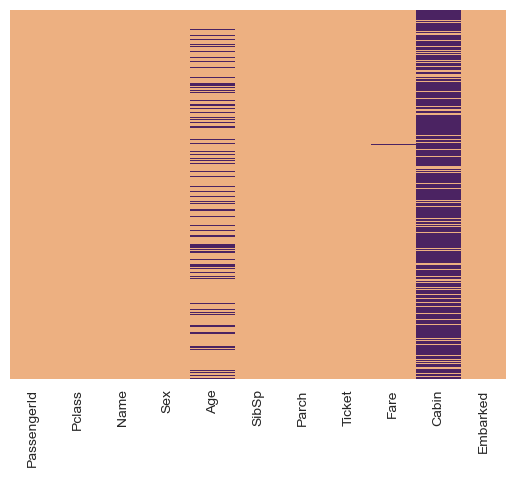

In [539]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='flare')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

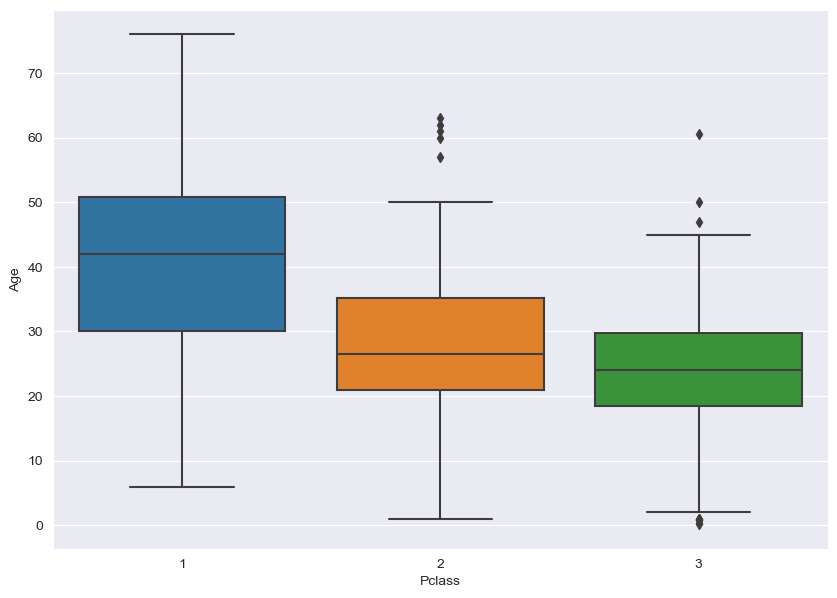

In [540]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=test)

In [541]:
def impute_age_test_set (cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 42 #from visually inspecting the box plot
        elif Pclass ==2:
            return 26
        else:
            return 25
    else:
        return Age

In [542]:
test['Age'] = test[['Age','Pclass']].apply(impute_age_test_set,axis=1)

In [543]:
test.drop('Cabin',axis=1,inplace=True)

In [544]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


<AxesSubplot:>

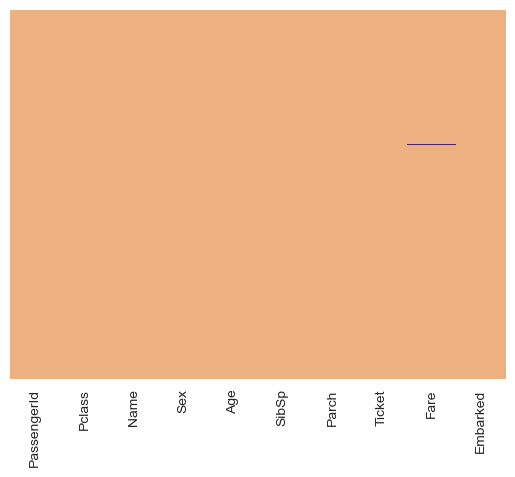

In [545]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='flare')

In [546]:
test.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,False,False,False,False,False
414,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False
416,False,False,False,False,False,False,False,False,False,False


In [547]:
test[test['Fare'].isnull()==True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [548]:
test['Fare'][152] = test[test['Pclass']==3]['Fare'].mean()
#cleaning the remaining NaN

In [419]:
test.dropna(inplace=True)

In [549]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [550]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [551]:
sexTest = pd.get_dummies(test['Sex'],drop_first=True)
embarkTest = pd.get_dummies(test['Embarked'],drop_first=True)

In [552]:
sexTest.head()

,male
0,1
1,0
2,1
3,1
4,0


In [553]:
embarkTest.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [554]:
test = pd.concat([test,sexTest,embarkTest],axis=1)

In [555]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


In [556]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace = True)

In [557]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [498]:
#test.drop('PassengerId',axis=1,inplace=True)

#needed in Kaggle

In [558]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [559]:
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,25.0,0,0,8.0500,1,0,1
414,1306,1,39.0,0,0,108.9000,0,0,0
415,1307,3,38.5,0,0,7.2500,1,0,1
416,1308,3,25.0,0,0,8.0500,1,0,1


In [560]:
test = pd.concat([test,pd.get_dummies(test['Pclass'],
    drop_first=True)],axis=1)

In [561]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,892,3,34.5,0,0,7.8292,1,1,0,0,1
1,893,3,47.0,1,0,7.0000,0,0,1,0,1
2,894,2,62.0,0,0,9.6875,1,1,0,1,0
3,895,3,27.0,0,0,8.6625,1,0,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1,0,1


In [562]:
test.drop('Pclass',axis=1,inplace=True)

In [563]:
test.head()

,PassengerId,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,892,34.5,0,0,7.8292,1,1,0,0,1
1,893,47.0,1,0,7.0000,0,0,1,0,1
2,894,62.0,0,0,9.6875,1,1,0,1,0
3,895,27.0,0,0,8.6625,1,0,1,0,1
4,896,22.0,1,1,12.2875,0,0,1,0,1


In [564]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [436]:
train.columns


Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 2, 3], dtype='object')

In [359]:
#test.rename(columns={2.0:2,3.0:3})

#not sure what happened that made this necessary the first time
#i ran this process. test is no longer replaced with NaN and the class
#columns are int instead of float now to match train.

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0.0,0.0,7.8292,1.0,1.0,0.0,0,1
1,47.0,1.0,0.0,7.0000,0.0,0.0,1.0,0,1
4,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,0,1
5,14.0,0.0,0.0,9.2250,1.0,0.0,1.0,0,1
6,30.0,0.0,0.0,7.6292,0.0,1.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [506]:
test

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
413,25.0,0,0,8.0500,1,0,1,0,1
414,39.0,0,0,108.9000,0,0,0,0,0
415,38.5,0,0,7.2500,1,0,1,0,1
416,25.0,0,0,8.0500,1,0,1,0,1


In [565]:
X_test = test.drop('PassengerId',axis=1)
#y_test = train['Survived'] there is no survived column

In [566]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [567]:
predictions = logmodel.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [569]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [572]:
predictionsDF = pd.concat([test['PassengerId'],pd.DataFrame(predictions)],axis=1)

In [573]:
predictionsDF

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [512]:
predictions

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [513]:
test.iloc[150:155]

,Age,SibSp,Parch,Fare,male,Q,S,2,3
150,23.0,0,1,83.158300,0,0,0,0,0
151,25.0,0,0,7.895800,1,0,0,0,1
152,60.5,0,0,12.459678,1,0,1,0,1
153,36.0,0,2,12.183300,0,0,1,0,1
154,13.0,4,2,31.387500,1,0,1,0,1


In [465]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     417 non-null    float64
 1   SibSp   417 non-null    int64  
 2   Parch   417 non-null    int64  
 3   Fare    417 non-null    float64
 4   male    417 non-null    uint8  
 5   Q       417 non-null    uint8  
 6   S       417 non-null    uint8  
 7   2       417 non-null    uint8  
 8   3       417 non-null    uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 34.5 KB


In [466]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       417 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB


In [514]:
test2 = pd.concat([test,predictions],axis=1)

In [515]:
test2.loc[152]

Age      60.500000
SibSp     0.000000
Parch     0.000000
Fare     12.459678
male      1.000000
Q         0.000000
S         1.000000
2         0.000000
3         1.000000
0         0.000000
Name: 152, dtype: float64

In [516]:
test2.rename(columns={0:'Survived'})


,Age,SibSp,Parch,Fare,male,Q,S,2,3,Survived
0,34.5,0,0,7.8292,1,1,0,0,1,0
1,47.0,1,0,7.0000,0,0,1,0,1,0
2,62.0,0,0,9.6875,1,1,0,1,0,0
3,27.0,0,0,8.6625,1,0,1,0,1,0
4,22.0,1,1,12.2875,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
413,25.0,0,0,8.0500,1,0,1,0,1,0
414,39.0,0,0,108.9000,0,0,0,0,0,1
415,38.5,0,0,7.2500,1,0,1,0,1,0
416,25.0,0,0,8.0500,1,0,1,0,1,0


In [454]:
test

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
413,25.0,0,0,8.0500,1,0,1,0,1
414,39.0,0,0,108.9000,0,0,0,0,0
415,38.5,0,0,7.2500,1,0,1,0,1
416,25.0,0,0,8.0500,1,0,1,0,1


In [453]:
test.iloc[300]

Age      26.0000
SibSp     0.0000
Parch     0.0000
Fare     15.0458
male      1.0000
Q         0.0000
S         0.0000
2         1.0000
3         0.0000
Name: 301, dtype: float64

In [523]:
predictions

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [574]:
predictionsDF.rename(columns={0:'Survived'},inplace=True)


In [575]:
predictionsDF

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [576]:
predictionsDF.to_csv('predictions.csv',index=False,header=['PassengerID','Survived'])

In [577]:
#76.5% accuracy

In [578]:
leaderboard = pd.read_csv('titanic-publicleaderboard.csv')

In [579]:
leaderboard.head()

,TeamId,TeamName,SubmissionDate,Score
0,9186557,Khlaifiabilel,2022-10-05 22:06:32,1.0
1,9243327,[Deleted] 4886840c-2277-48f1-9c5d-6af63172f526,2022-10-09 21:46:19,1.0
2,9249781,T.Ikeda,2022-10-06 08:42:46,1.0
3,9241527,alexstedev,2022-10-06 18:00:27,1.0
4,9253623,Amireddy,2022-10-07 04:33:25,1.0


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Score'>

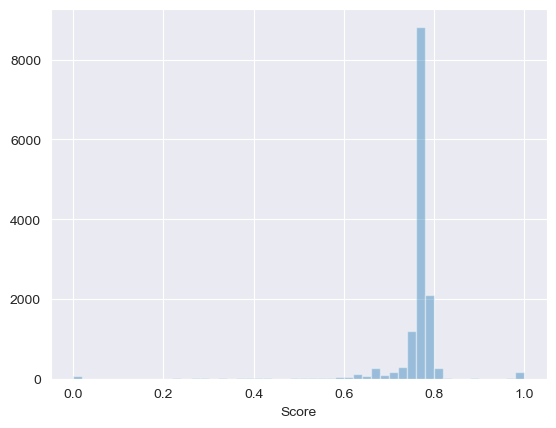

In [604]:
sns.distplot(leaderboard['Score'],kde=False)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

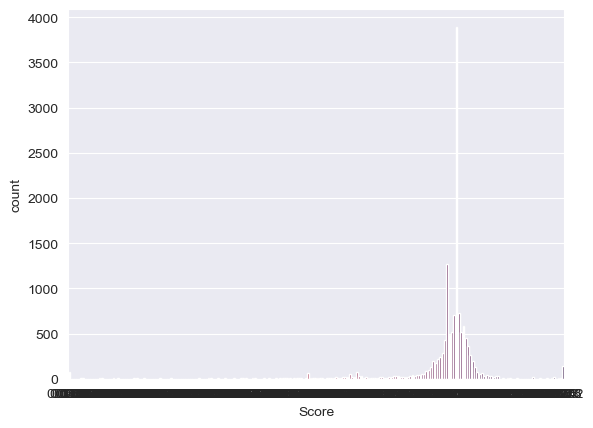

In [606]:
sns.countplot(x='Score',data=leaderboard,palette='flare')
plt.tight_layout


(0.6, 1.0)

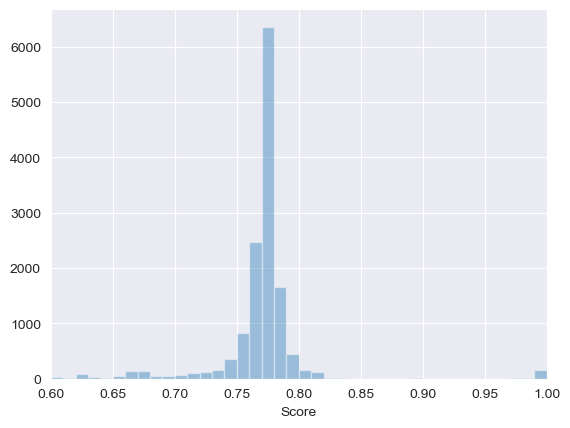

In [610]:
sns.distplot(leaderboard['Score'],kde=False,bins=100)
plt.xlim(.6,1)

In [611]:
leaderboard['Score'].iplot(kind='histogram')